In [ ]:
import numpy as np
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras import Model, layers
from keras.models import load_model, model_from_json
#from tensorflow.keras import Model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
CHANNELS=3

train_datagen = ImageDataGenerator(
    shear_range=10,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Pinapple_project/pine apple/Pine Apple/Train',
    batch_size=32,
    class_mode='categorical',
    target_size=(224,224))

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

validation_generator = validation_datagen.flow_from_directory(
   '/content/drive/MyDrive/Pinapple_project/pine apple/Pine Apple/Validation',
    shuffle=False,
    class_mode='categorical',
    target_size=(224,224))
test_generator = validation_datagen.flow_from_directory(
   '/content/drive/MyDrive/Pinapple_project/pine apple/Pine Apple/Test',
    shuffle=False,
    class_mode='categorical',
    target_size=(224,224))

Found 100 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [ ]:
x,y=test_generator.next()
x.shape

(30, 224, 224, 3)

In [ ]:
conv_base = ResNet50(
    include_top=False,
    weights='imagenet')

for layer in conv_base.layers:
    layer.trainable = False

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
predictions = layers.Dense(2, activation='softmax')(x)
model = Model(conv_base.input, predictions)

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
history = model.fit(
    train_generator,
    batch_size=32,
    validation_data=test_generator,
    epochs= 3
)

Epoch 1/3
4/4 [==============================] - 44s 13s/step - loss: 1.1968 - accuracy: 0.6700 - val_loss: 0.3981 - val_accuracy: 0.7667
Epoch 2/3
4/4 [==============================] - 37s 9s/step - loss: 0.3080 - accuracy: 0.8500 - val_loss: 0.0934 - val_accuracy: 0.9667
Epoch 3/3
4/4 [==============================] - 37s 8s/step - loss: 0.1245 - accuracy: 0.9300 - val_loss: 0.0108 - val_accuracy: 1.0000


In [ ]:
loss, accuracy = model.evaluate(test_generator )

# Print the accuracy
print("Accuracy: " + str(accuracy))
# Print the loss
print("Loss: " + str(loss))

1/1 [==============================] - 7s 7s/step - loss: 0.0108 - accuracy: 1.0000
Accuracy: 1.0
Loss: 0.01078366581350565


In [ ]:
test_generator.class_indices

{'Bad': 0, 'Good': 1}

In [ ]:
import numpy as np
from sklearn import metrics

predictions = model.predict_generator(test_generator)
predicted_classes = np.argmax(predictions, axis = 1)
true_classes = test_generator.classes
class_labels = ['Bad','Good']
report = metrics.classification_report(true_classes, predicted_classes, target_names = class_labels)
print(report)

<ipython-input-29-6397bf7cfff7>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


              precision    recall  f1-score   support

         Bad       1.00      1.00      1.00        15
        Good       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Axes: >

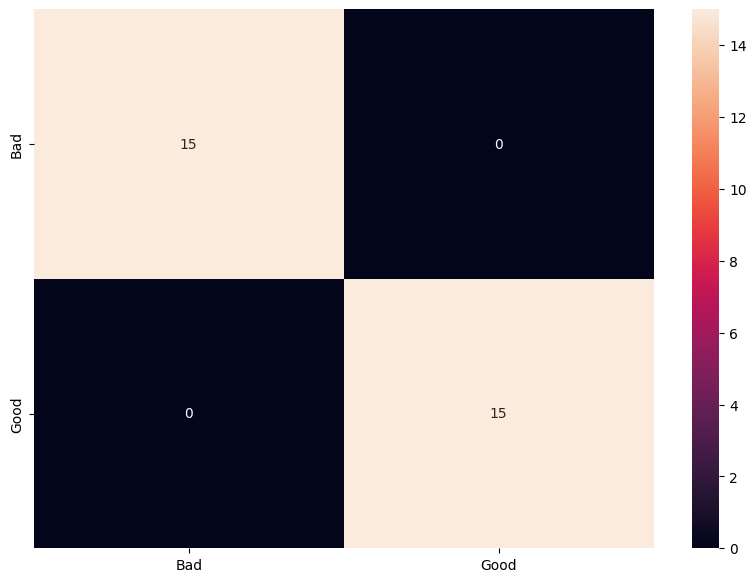

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


cm = metrics.confusion_matrix(true_classes, predicted_classes)
df_cm = pd.DataFrame(cm, index = [i for i in ['Bad','Good']],
                  columns = [i for i in ['Bad','Good']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='d')

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

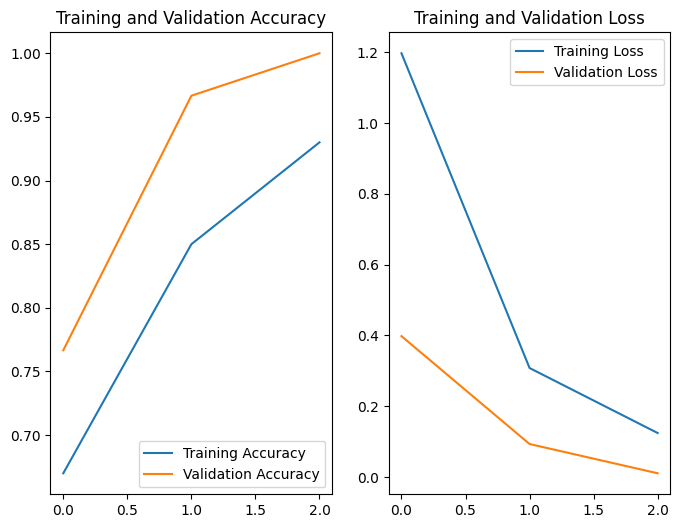

In [ ]:
EPOCHS=3
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

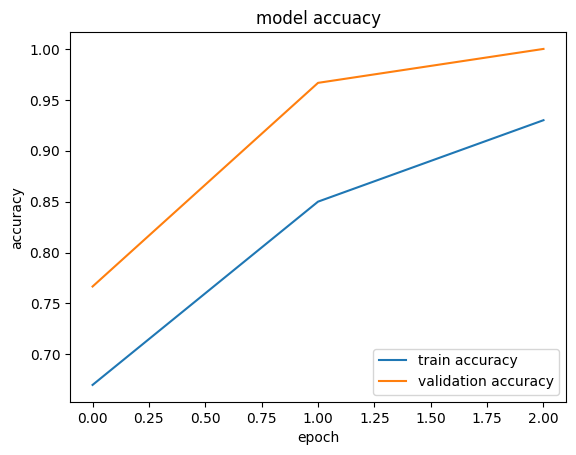

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuacy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right')
plt.show()

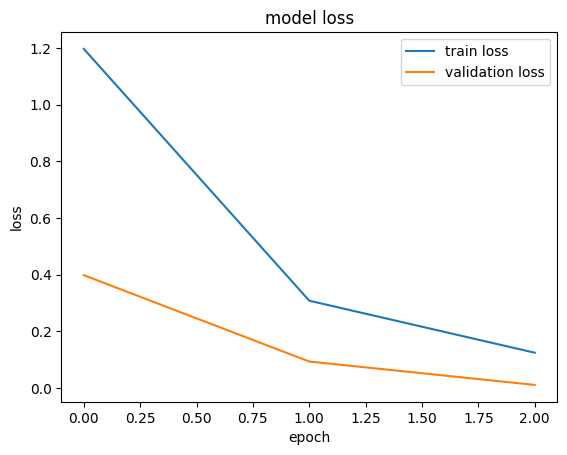

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
plt.show()